# Data Analysis
In this notebook we will pull our raw data from ```raw_data``` and perform some analysis. 

For the purpose of this project we will be looking for the deviation in price for different ```targets```.

A target is essentially how far we are projecting - what the model will learn to classify given a certain time window. 

Therefor if our window size is 15, and our target is 3. We will label the window buy or sell depending on a percentage change from the close of the 15th and opening of the 18th (in this case). 

## Default 
By default, our window_size is 15 and our target_size is 3, therefore we are trying to predict the 18th window. 

In our default example each timestep is of 1hr intervals. Therefor our window is 15 hours and our target is 3 hours. We are trying to predict 3 hours into the future.

## Our Process
We will take the entire time-series of data and perform a **window roll** operation to formulate a dataset into a pandas dataframe object

In [1]:
from omega_analysis import *
import matplotlib.pyplot as plt

In [2]:
# grabbing our data
file = f'{os.curdir}/raw_data'
file = f'{file}/{os.listdir(file)[0]}'

In [3]:
# loading into a dataframe
headers = ['date', 'complete', 'open', 'high', 'low', 'close', 'volume']

my_dtypes = {
    'date': 'str',
    'complete': 'bool',
    'open': 'float',
    'high': 'float',
    'low': 'float',
    'close': 'float',
    'volume': 'float'
}

my_parse_dates = ['date']

df = pd.read_csv(file, names=headers, dtype=my_dtypes, parse_dates=my_parse_dates)

# dropping everything but open, close, date
df.drop(columns=['complete', 'low', 'high', 'volume'], axis=1, inplace=True)

In [52]:
changes_df = return_open_close_range_change(df, range_=48)

In [53]:
changes_df.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,-0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.00013,-0.00011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00086,0.00008,0.00010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00107,0.00006,-0.00072,-0.00070,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.00001,0.00006,-0.00095,-0.00173,-0.00171,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Let's check our data
summary = changes_df.describe()

In [55]:
summary

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
count,1.240800e+04,12407.000000,12406.000000,12405.000000,12404.000000,12403.00000,12402.000000,12401.000000,12400.000000,12399.000000,...,12370.000000,12369.000000,12368.000000,12367.000000,12366.000000,12365.000000,12364.000000,12363.000000,12362.000000,12361.000000
mean,-7.059961e-07,-0.000011,-0.000021,-0.000030,-0.000040,-0.00005,-0.000059,-0.000069,-0.000079,-0.000089,...,-0.000385,-0.000395,-0.000405,-0.000415,-0.000425,-0.000435,-0.000445,-0.000456,-0.000466,-0.000476
std,1.895779e-03,0.000386,0.001948,0.002788,0.003450,0.00401,0.004517,0.004914,0.005265,0.005572,...,0.012285,0.012457,0.012625,0.012795,0.012962,0.013124,0.013288,0.013450,0.013611,0.013770
min,-2.900000e-02,-0.024730,-0.082470,-0.095590,-0.107340,-0.12996,-0.143080,-0.155700,-0.162340,-0.149470,...,-0.179740,-0.184520,-0.180280,-0.179160,-0.185480,-0.179220,-0.179420,-0.184150,-0.182920,-0.179440
25%,-7.000000e-04,-0.000040,-0.000690,-0.000990,-0.001253,-0.00144,-0.001670,-0.001880,-0.002080,-0.002320,...,-0.006080,-0.006200,-0.006270,-0.006340,-0.006440,-0.006470,-0.006553,-0.006610,-0.006720,-0.006860
50%,-2.000000e-05,0.000000,0.000005,-0.000010,0.000000,0.00000,0.000000,0.000000,0.000010,0.000040,...,0.000050,0.000060,0.000060,0.000090,0.000080,0.000080,0.000020,0.000010,-0.000005,-0.000030
75%,6.625000e-04,0.000020,0.000690,0.000960,0.001190,0.00139,0.001610,0.001820,0.002030,0.002220,...,0.005910,0.006020,0.006093,0.006240,0.006277,0.006330,0.006440,0.006540,0.006647,0.006740
max,8.246000e-02,0.011390,0.029200,0.030590,0.042900,0.05259,0.052980,0.046360,0.032960,0.029980,...,0.054640,0.053130,0.051160,0.051580,0.057780,0.058840,0.057480,0.056080,0.057140,0.058000


In [56]:
summary.loc['std'].sort_values(ascending=True)

2     0.000386
1     0.001896
3     0.001948
4     0.002788
5     0.003450
6     0.004010
7     0.004517
8     0.004914
9     0.005265
10    0.005572
11    0.005884
12    0.006182
13    0.006479
14    0.006765
15    0.007059
16    0.007337
17    0.007596
18    0.007842
19    0.008084
20    0.008312
21    0.008548
22    0.008786
23    0.009026
24    0.009276
25    0.009522
26    0.009759
27    0.009994
28    0.010220
29    0.010430
30    0.010633
31    0.010828
32    0.011011
33    0.011193
34    0.011376
35    0.011563
36    0.011749
37    0.011928
38    0.012105
39    0.012285
40    0.012457
41    0.012625
42    0.012795
43    0.012962
44    0.013124
45    0.013288
46    0.013450
47    0.013611
48    0.013770
Name: std, dtype: float64

In [57]:
summary.loc['mean'].sort_values(ascending=True)

48   -4.759930e-04
47   -4.657636e-04
46   -4.555763e-04
45   -4.454723e-04
44   -4.353813e-04
43   -4.254132e-04
42   -4.153368e-04
41   -4.052733e-04
40   -3.951961e-04
39   -3.853274e-04
38   -3.755040e-04
37   -3.655189e-04
36   -3.554166e-04
35   -3.450792e-04
34   -3.346626e-04
33   -3.242817e-04
32   -3.139953e-04
31   -3.035943e-04
30   -2.933516e-04
29   -2.830145e-04
28   -2.727663e-04
27   -2.625133e-04
26   -2.522200e-04
25   -2.419436e-04
24   -2.314727e-04
23   -2.211917e-04
22   -2.110002e-04
21   -2.009098e-04
20   -1.909363e-04
19   -1.809774e-04
18   -1.707643e-04
17   -1.604535e-04
16   -1.499960e-04
15   -1.394965e-04
14   -1.291279e-04
13   -1.187819e-04
12   -1.084972e-04
11   -9.840136e-05
10   -8.853295e-05
9    -7.875806e-05
8    -6.893315e-05
7    -5.933559e-05
6    -4.973071e-05
5    -4.009836e-05
4    -3.039258e-05
3    -2.056747e-05
2    -1.062545e-05
1    -7.059961e-07
Name: mean, dtype: float64

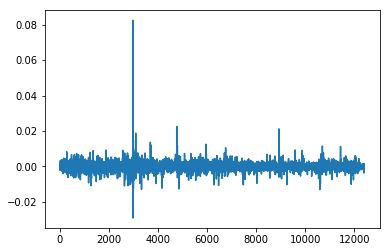

In [39]:
plt.plot(changes_df[1])

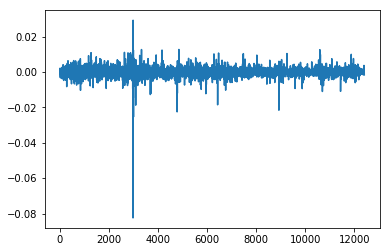

In [40]:
plt.plot(changes_df[3])

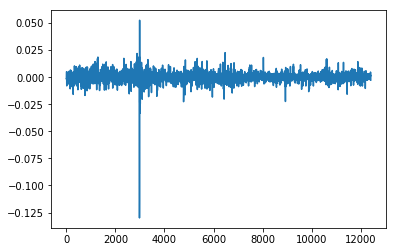

In [42]:
plt.plot(changes_df[6])

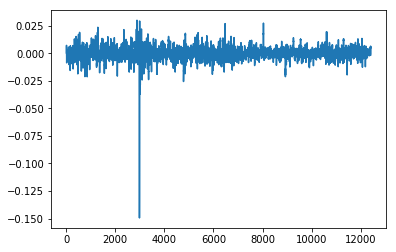

In [41]:
plt.plot(changes_df[10])

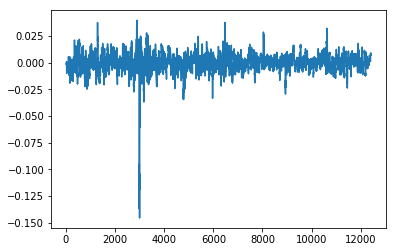

In [66]:
plt.plot(changes_df[24])

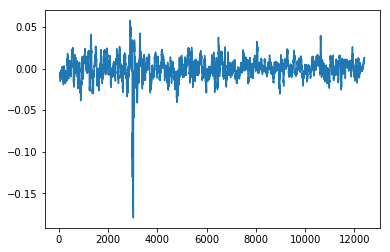

In [67]:
plt.plot(changes_df[48])

[]

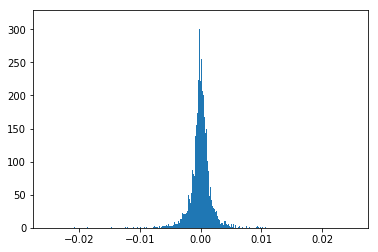

In [69]:
plt.hist(changes_df[3], bins=1000, range=(-0.025, 0.025))
plt.plot()

[]

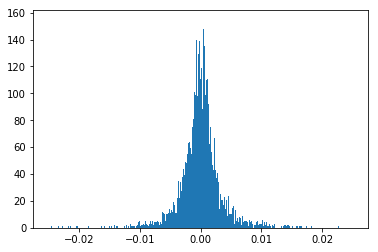

In [61]:
plt.hist(changes_df[6], bins=1000, range=(-0.025, 0.025))
plt.plot()

[]

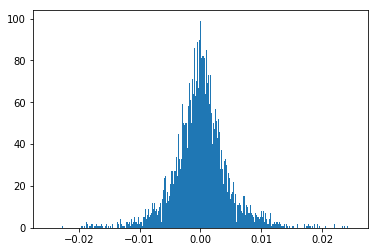

In [63]:
plt.hist(changes_df[10], bins=1000, range=(-0.025, 0.025))
plt.plot()

[]

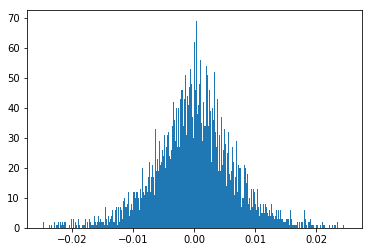

In [59]:
plt.hist(changes_df[20], bins=1000, range=(-0.025, 0.025))
plt.plot()

[]

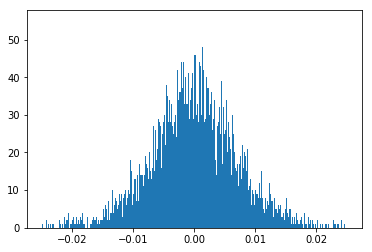

In [60]:
plt.hist(changes_df[24], bins=1000, range=(-0.025, 0.025))
plt.plot()

[]

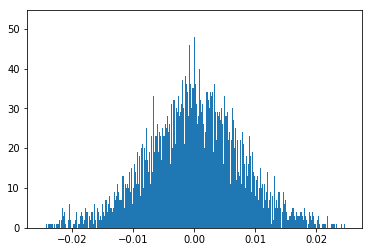

In [64]:
plt.hist(changes_df[30], bins=1000, range=(-0.025, 0.025))
plt.plot()

[]

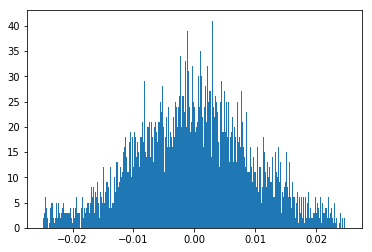

In [65]:
plt.hist(changes_df[48], bins=1000, range=(-0.025, 0.025))
plt.plot()

In [ ]:
# Measuring len within certain time frames

[]

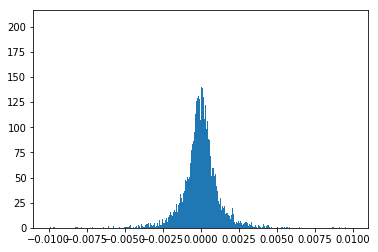

In [48]:
plt.hist(df['change'], bins=1000, range=(-0.01, 0.01))
plt.plot()